In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
toss=np.array(["s","c","c","c","c"])

In [3]:
def P(H):
    return 1/2.

In [4]:
def P_obs_H(nc,ns,H):
    P=H**nc*(1-H)**ns
    return P

In [5]:
def P_obs(nc,ns,H):
    p=0
    for i in range(len(H)):
        p+=P_obs_H(nc,ns,H[i])*P(H[i])
    return p

In [6]:
def P_H_obs(nc,ns,H,toss):
    p=P_obs_H(nc,ns,H)*P(H)/P_obs(nc,ns,H)
    return p

In [7]:
def x_max(y,H):
    for i in range(len(y)):
        if y[i]==0:
            y[i]=10**(-20)
        if np.diff(np.log(y))[i]*np.diff(np.log(y))[i+1]<0 :
            return (H[i]+H[i+1])/2, i

In [8]:
def sigma(y,x_bar,pos):
    for i in range(len(y)):
        if y[i]==0:
            y[i]=10**-20
    return -np.diff(np.diff(np.log(y)))[pos]

In [9]:
H=np.arange(0,1.1,0.05)

In [10]:
y=P_H_obs(np.count_nonzero(toss == "s"),np.count_nonzero(toss == "c"),H,toss)
print(y)

[0.00000000e+00 6.14709810e-02 9.90320470e-02 1.18187809e-01
 1.23650439e-01 1.19396276e-01 1.08722426e-01 9.43033649e-02
 7.82475433e-02 6.21539866e-02 4.71688991e-02 3.40422662e-02
 2.31844573e-02 1.47228285e-02 8.55832505e-03 4.42208429e-03
 1.93203811e-03 6.49515740e-04 1.35846429e-04 8.96209083e-06
 0.00000000e+00 9.90546881e-06]


Text(0, 0.5, 'P(H|obs)')

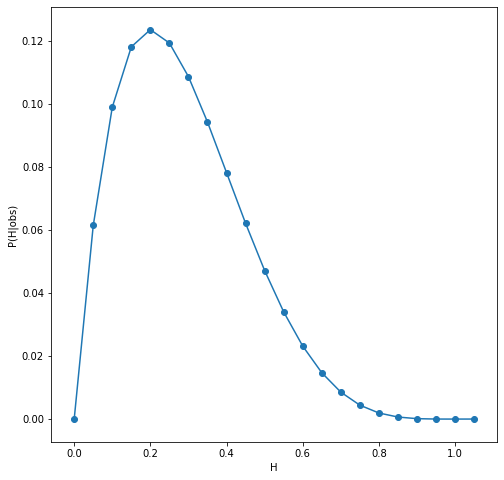

In [11]:
plt.figure(figsize=(8,8))
plt.plot(H,y)
plt.scatter(H,y)
plt.xlabel("H")
plt.ylabel('P(H|obs)')

In [12]:
x_bar=x_max(y, H)[0]
pos=x_max(y, H)[1]
#print(x_bar)
#x_max(y, H)

/home/john/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [13]:
sig=sigma(y,x_bar,pos)
print(sig)
valor=[x_bar,"+/-",sig]

0.08019411842211666


In [14]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/(sig*np.power(2.*np.pi,0.5))

Text(0.5, 0.98, "[0.17500000000000002, '+/-', 0.08019411842211666]")

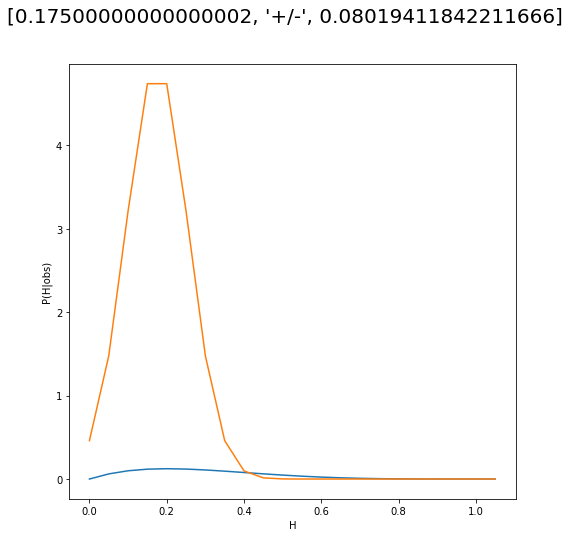

In [15]:
plt.figure(figsize=(8,8))
plt.plot(H,y)
plt.plot(H,gaussian(H,x_bar,sig))
#plt.plot(H,gaussian(H,x_bar,1))
plt.xlabel("H")
plt.ylabel('P(H|obs)')
plt.suptitle(valor, fontsize=20)

- La curva gaussiana (naranja) es más alta debido al valor de sigma, esto quiere decir que el valor de sigma está al estimado, posiblemente a la forma en la que se ha definido P(H)